In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In the previous section we saw that two kinds of histograms can be associated with a quantity generated by a random process.

- The **probability histogram** shows all the possible values of the quantity and the probabilities of all those values. The probabilities are calculated using math and the rules of chance.

- The **empirical histogram** is based on running the random process repeatedly and keeping track of the value of the quantity each time. It shows all the values of the quantity and the proportion of times each value was observed among all the repetitions.

We noted that by the Law of Averages, the empirical histogram is likely to resemble the probability histogram if the random process is repeated a large number of of times.

This means that simulating random processes repeatedly is a way of approximating probability distributions *without figuring out the probabilities mathematically.* Thus computer simulations become a powerful tool in data science. They can help data scientists understand the properties of random quantities that would be complicated to analyze using math alone.

Here is an example of such a simulation.

Estimating the number of enemy aircraft
-------------------------------------

In World War II, data analysts working for the Allies were tasked with estimating the number of German warplanes. The data included the serial numbers of the German planes that had been observed by Allied forces. These serial numbers gave the data analysts a way to come up with an answer.

To create an estimate of the total number of warplanes, the data analysts had to make some assumptions about the serial numbers. Here are two such assumptions, greatly simplified to make our calculations easier.

1. There are N planes, numbered $1, 2, ... , N$. 

2. The observed planes are drawn uniformly at random with replacement from the $N$ planes.

The goal is to estimate the number $N$.

Suppose you observe some planes and note down their serial numbers. How might you use the data to guess the value of $N$? A natural and straightforward method would be to simply use the **largest serial number observed**.

Let us see how well this method of estimation works. First, another simplification: Some historians now estimate that the German aircraft industry produced almost 100,000 warplanes of many different kinds, But here we will imagine just one kind. That makes Assumption 1 above easier to justify.

Suppose there are in fact $N = 300$ planes of this kind, and that you observe 30 of them. We can construct a table called ``serialno`` that contains the serial numbers 1 through $N$. We can then sample 30 times with replacement (see Assumption 2) to get our sample of serial numbers. Our estimate is the maximum of these 30 numbers.

In [2]:
N = 300
serialno = Table().with_column('serial number', np.arange(1, N+1))
serialno

serial number
1
2
3
4
5
6
7
8
9
10


In [3]:
max(serialno.sample(30, with_replacement=True).column(0))

273

As with all code involving random sampling, run it a few times to see the variation. You will observe that even with just 30 observations from among 300, the largest serial number is typically in the 250-300 range. 

In principle, the largest serial number could be as small as 1, if you were unlucky enough to see Plane Number 1 all 30 times. And it could be as large as 300 if you observe Plane Number 300 at least once. But usually, it seems to be in the very high 200's. It appears that if you use the largest observed serial number as your estimate of the total, you will not be very far wrong.

Let us generate some data to see if we can confirm this. We will use *iteration* to repeat the sampling procedure numerous times, each time noting the largest serial number observed. These would be our estimates of $N$ from all the numerous samples. We will then draw a histogram of all these estimates, and examine by how much they differ from $N = 300$.

In the code below, we will run 750 repetitions of the following process: Sample 30 times at random with replacement from 1 through 300 and note the largest number observed.

To do this, we will use a ``for`` loop. As you have seen before, we will start by setting up an empty table that will eventually hold all the estimates that are generated. As each estimate is the largest number in its sample, we will call this table ``maxes``.

For each integer (called ``i`` in the code) in the range 0 through 749 (750 total), the ``for`` loop executes the code in the body of the loop. In this example, it generates a random sample of 30 serial numbers, computes the maximum value, and augments the rows of ``maxes`` with that value.

In [4]:
sample_size = 30
repetitions = 750

maxes = Table(['i', 'max'])
for i in np.arange(repetitions):
    sample = serialno.sample(sample_size, with_replacement=True)
    maxes.append([i, max(sample.column(0))])    
maxes

i,max
0,300
1,287
2,296
3,295
4,286
5,300
6,281
7,291
8,298
9,287


Here is a histogram of the 750 estimates. As you can see, the estimates are all crowded up near 300, even though in theory they could be much smaller. The histogram indicates that as an estimate of the total number of planes, the largest serial number might be too low by about 10 to 25. But it is extremely unlikely to be underestimate the true number of planes by more than about 50.

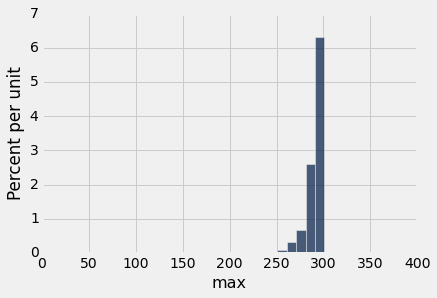

In [5]:
every_ten = np.arange(1, N+100, 10)
maxes.hist('max', bins=every_ten)

The empirical distribution of a statistic
--------------------------------------

In the example above, the largest serial number is called a *statistic* (singular!). A *statistic* is any number computed using the data in a sample. 

The graph above is an empirical histogram. It displays the empirical or observed distribution of the statistic, based on 750 samples.

**The statistic could have been different.**

A fundamental consideration in using any statistic based on a random sample is that *the sample could have come out differently*, and therefore the statistic could have come out differently too. 

**Just how different could the statistic have been?**

If you generate *all* of the possible samples, and compute the statistic for each of them, then you will have a clear picture of how different the statistic might have been. Indeed, you will have a complete enumeration of all the possible values of the statistic and all their probabilities. The resulting distribution is called the *probability distribution* of the statistic, and its histogram is the same as the probability histogram.

The probability distribution of a statistic is also called the *sampling distribution* of the statistic, because it is based on all of the possible samples.

The total number of possible samples is often very large. For example, the total number of possible sequences of 30 serial numbers that you could see if there were 300 aircraft is

In [7]:
300**30

205891132094649000000000000000000000000000000000000000000000000000000000000

That's a lot of samples. Fortunately, we don't have to generate all of them. We know that the empirical histogram of the statistic, based on many but not all of the possible samples, is a good approximation to the probability histogram. The empirical distribution of a statistic gives a good idea of how different the statistic could be.

It is true that the probability distribution of a statistic contains more accurate information about the statistic than an empirical distribution does. 
But often, as in this example, the approximation provided by the empirical distribution is sufficient for data scientists to understand how much a statistic can vary. And empirical distributions are easier to compute. Therefore, data scientists often use empirical distributions instead of exact probability distributions when they are trying to understand random quantities.

**Another Estimate.**

Here is an example to illustrate this point. Thus far, we have used the largest observed serial number as an estimate of the total number of planes. But there are other possible estimates, and we will now consider one of them. 

The idea underlying this estimate is that the *average* of the observed serial numbers is likely be about halfway between 1 and $N$. Thus, if $A$ is the average, then
$$
A ~ \approx ~ \frac{N}{2} ~~~ \mbox{and so} ~~~ N \approx 2A
$$

Thus a new statistic can be used to estimate the total number of planes: take the average of the observed serial numbers and double it.

How does this method of estimation compare with using the largest number observed? It is not easy to calculate the probability distribution of the new statistic. But as before, we can simulate it to get the probabilities approximately. Let's take a look at the empirical distribution based on repeated sampling. The number of repetitions is chosen to be the same as it was for the earlier estimate. This will allow us to compare the two empirical distributions.

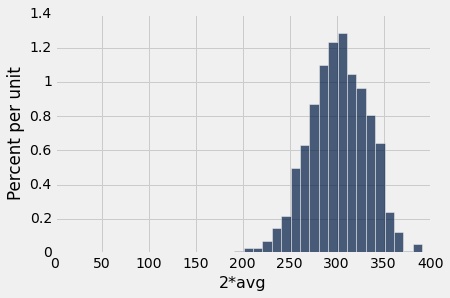

In [6]:
new_est = Table(['i', '2*avg'])

for i in np.arange(repetitions):
    sample = serialno.sample(sample_size, with_replacement=True)
    new_est.append([i, 2 * np.average(sample.column(0))])
    
new_est.hist('2*avg', bins=every_ten)

Notice that unlike the earlier estimate, this one can overestimate the number of planes. This will happen when the average of the observed serial numbers is closer to $N$ than to 1.

You can see that the old method almost always underestimates; formally, we say that it is *biased*. But it has low variability, and is highly likely to be close to the true total number of planes. 

The new method overestimates about as often as it underestimates, and thus is called *unbiased* on average in the long run. However, it is more variable than the old estimate, and thus is prone to larger absolute errors.

This is an instance of a *bias-variance tradeoff* that is not uncommon among competing estimates. Which estimate you decide to use will depend on the kinds of errors that matter the most to you. In the case of enemy warplanes, underestimating the total number might have grim consequences, in which case you might choose to use the more variable method that overestimates about half the time. On the other hand, if overestimation leads to needlessly high costs of guarding against planes that don't exist, you might be satisfied with the method that underestimates by a modest amount. 

**Technical note:** In fact, twice the average is not unbiased. On average, it overestimates by exactly 1. For example, if `N` is 3, the average of draws from 1, 2, and 3 will be 2, and 2 times 2 is 4, which is one more than `N`. Twice the average minus 1 is an unbiased estimator of `N`.